In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('energydata.csv')

# Split the data into features (X) and target variable (y)
X = data.drop(['date', 'Appliances'], axis=1)
y = data['Appliances']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [53]:
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


EDA

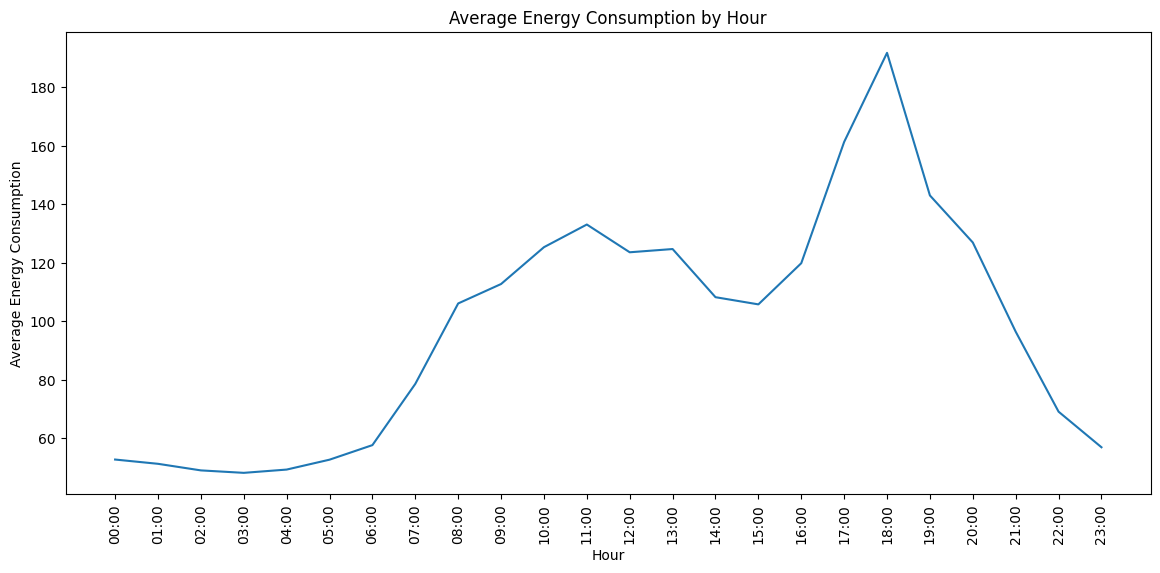

In [52]:
#Exploratory Data Analysis, showing user behaviour pattern

data_EDA = data.copy()

data_EDA['date'] = pd.to_datetime(data_EDA['date'])
data_EDA.set_index('date', inplace=True)
data_EDA = data_EDA.resample('1H').mean()
data_EDA.reset_index(inplace=True)

data_EDA['Month'] = data_EDA['date'].dt.month
data_EDA['Year'] = data_EDA['date'].dt.year
data_EDA['Date'] = data_EDA['date'].dt.date
data_EDA['Time'] = data_EDA['date'].dt.strftime('%H:%M:%S')
data_EDA['Day'] = data_EDA['date'].dt.day_name()

hourly_energy = data_EDA.groupby('Time')['Appliances'].sum()
hourly_energy_sorted = hourly_energy.sort_values(ascending=False)

hourly_energy = data_EDA.groupby(data_EDA['date'].dt.hour)['Appliances'].mean()

# Create a range of hourly timestamps from 00:00 to 23:00
hours = pd.date_range(start='00:00', end='23:00', freq='H').strftime('%H:%M').tolist()

# Reindex the hourly energy consumption to ensure all hours are included
hourly_energy_sorted = hourly_energy.reindex(range(24), fill_value=0)

plt.figure(figsize=(14, 6))
plt.plot(hours, hourly_energy_sorted)
plt.xlabel('Hour')
plt.ylabel('Average Energy Consumption')
plt.title('Average Energy Consumption by Hour')
plt.xticks(rotation='vertical')
plt.show()


In [3]:
# Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled, y_train)
linear_reg_pred = linear_reg.predict(X_test_scaled)

In [4]:
# Decision Tree Regression model with hyperparameter tuning
tree_reg = DecisionTreeRegressor(random_state=42)
tree_param_grid = {'max_depth': [None, 5, 10, 15],
                   'min_samples_split': [2, 5, 10]}
tree_reg_cv = GridSearchCV(tree_reg, tree_param_grid, scoring='neg_mean_absolute_error', cv=5)
tree_reg_cv.fit(X_train_scaled, y_train)
tree_reg_pred = tree_reg_cv.predict(X_test_scaled)


In [ ]:
# Random Forest Regression model with hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest_reg = RandomForestRegressor(random_state=42)
forest_param_grid = {'n_estimators': [100, 200, 300],
                     'max_depth': [None, 5, 10],
                     'min_samples_split': [2, 5]}
forest_reg_cv = GridSearchCV(forest_reg, forest_param_grid, scoring='neg_mean_absolute_error', cv=5)
forest_reg_cv.fit(X_train_scaled, y_train)
forest_reg_pred = forest_reg_cv.predict(X_test_scaled)


In [13]:
# Evaluate the models
linear_reg_mae = mean_absolute_error(y_test, linear_reg_pred)
tree_reg_mae = mean_absolute_error(y_test, tree_reg_pred)
forest_reg_mae = mean_absolute_error(y_test, forest_reg_pred)

linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_pred))
tree_reg_rmse = np.sqrt(mean_squared_error(y_test, tree_reg_pred))
forest_reg_rmse = np.sqrt(mean_squared_error(y_test, forest_reg_pred))

linear_reg_r2 = r2_score(y_test, linear_reg_pred)
tree_reg_r2 = r2_score(y_test, tree_reg_pred)
forest_reg_r2 = r2_score(y_test, forest_reg_pred)

In [14]:
# Plotting feature importances for Random Forest Regression
feature_importances = forest_reg_cv.best_estimator_.feature_importances_
feature_names = X.columns
sorted_indices = np.argsort(feature_importances)

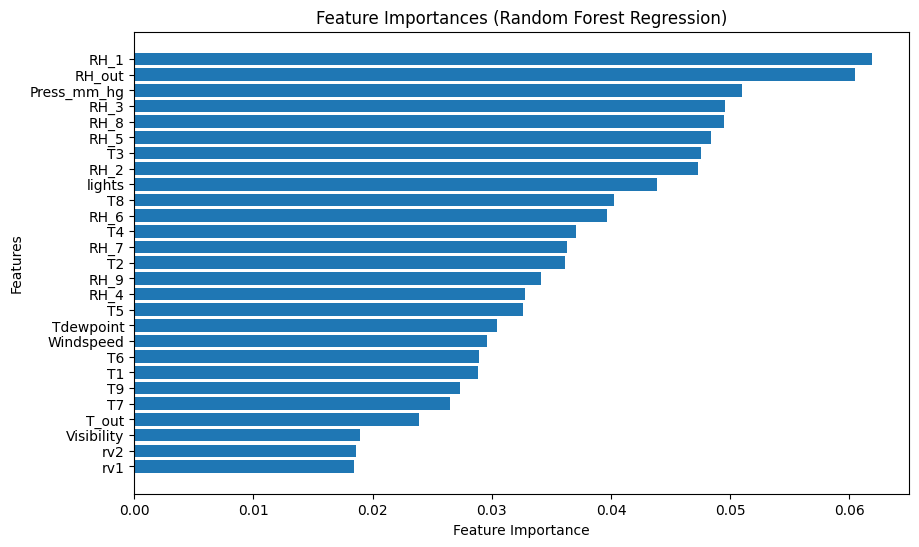

In [10]:
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_indices], align='center')
plt.yticks(range(len(feature_importances)), [feature_names[i] for i in sorted_indices])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances (Random Forest Regression)')
plt.show()

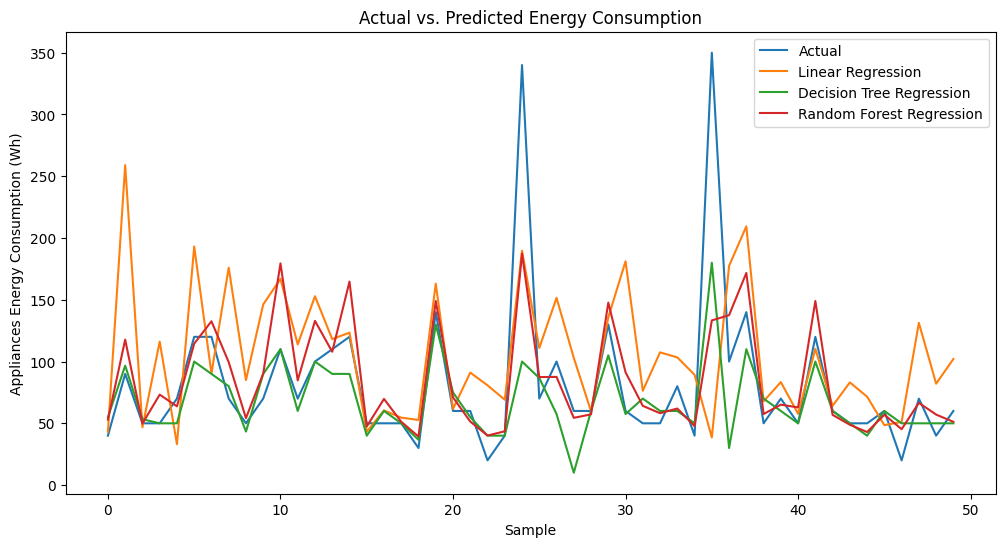

In [11]:
# Plotting actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:50], label='Actual')
plt.plot(linear_reg_pred[:50], label='Linear Regression')
plt.plot(tree_reg_pred[:50], label='Decision Tree Regression')
plt.plot(forest_reg_pred[:50], label='Random Forest Regression')
plt.xlabel('Sample')
plt.ylabel('Appliances Energy Consumption (Wh)')
plt.title('Actual vs. Predicted Energy Consumption')
plt.legend()
plt.show()

In [15]:
# Print evaluation metrics
print('Linear Regression MAE:', linear_reg_mae)
print('Decision Tree Regression MAE:', tree_reg_mae)
print('Random Forest Regression MAE:', forest_reg_mae)
print('---------------------------------------')
print('Linear Regression RMSE:', linear_reg_rmse)
print('Decision Tree Regression RMSE:', tree_reg_rmse)
print('Random Forest Regression RMSE:', forest_reg_rmse)
print('---------------------------------------')
print('Linear Regression R^2:', linear_reg_r2)
print('Decision Tree Regression R^2:', tree_reg_r2)
print('Random Forest Regression R^2:', forest_reg_r2)

Linear Regression MAE: 52.547692876146535
Decision Tree Regression MAE: 39.809348872561436
Random Forest Regression MAE: 32.523553753905915
---------------------------------------
Linear Regression RMSE: 91.17482597600878
Decision Tree Regression RMSE: 91.2548667247633
Random Forest Regression RMSE: 68.06197933910694
---------------------------------------
Linear Regression R^2: 0.16930416505473989
Decision Tree Regression R^2: 0.16784501882917102
Random Forest Regression R^2: 0.5370849542575264
